In [689]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

N_DATA = 200

In [690]:
data2 = json.load(open("data/mutual_information/human_assistant_instruct_0_200_2_users.json", "r"))
data3 = json.load(open("data/mutual_information/human_assistant_instruct_0_200_3_users.json", "r"))
data4 = json.load(open("data/mutual_information/human_assistant_instruct_0_200_4_users.json", "r"))

In [697]:
# get mutual information
mi_2 = [datum["mutual_information"] for datum in data2.values()][:N_DATA]
mi_3 = [datum["mutual_information"] for datum in data3.values()][:N_DATA]
mi_4 = [datum["mutual_information"] for datum in data4.values()][:N_DATA]

# raw_mi_1 = [datum for datum in mi_d1]
# raw_mi_2 = [datum for datum in mi_d2]
# raw_mi_3 = [datum for datum in mi_d3]

# mi_split_1 = [1 if datum > 1 * np.median(raw_mi_1) else 0 for datum in raw_mi_1]
mi_split_1 = [1 if datum > 2 * np.median(mi_2) else 0 for datum in mi_2]
mi_agreement_combined, mean_mi_agreement_combined, n_mi_combined = calculate_agreement(mi_split_1, pos_neg=None, maj_vote=maj_vote)
mi_agreement_answer_dir, mean_mi_agreement_answer_dir, n_mi_answer_dir = calculate_agreement(mi_split_1, pos_neg=0, maj_vote=maj_vote)
mi_agreement_ask_question, mean_mi_agreement_ask_question, n_mi_ask_question = calculate_agreement(mi_split_1, pos_neg=1, maj_vote=maj_vote)
print(mean_mi_agreement_combined, mean_mi_agreement_answer_dir, mean_mi_agreement_ask_question)
print(mi_split_1.count(1), maj_vote.count(1))

124
0.75 0.8387096774193549 0.6052631578947368
66 76


In [688]:
# load labels / model judgement 
maj_vote = json.load(open("data/labels/exp_when_9_pp_maj_votes_0_200.json", "r"))

# llama 
llama = json.load(open("data/labels/llama_0_200_answer_first.json", "r"))

# gpt4
gpt4 = json.load(open("data/labels/gpt4_0_200_answer_first.json", "r"))["label"]

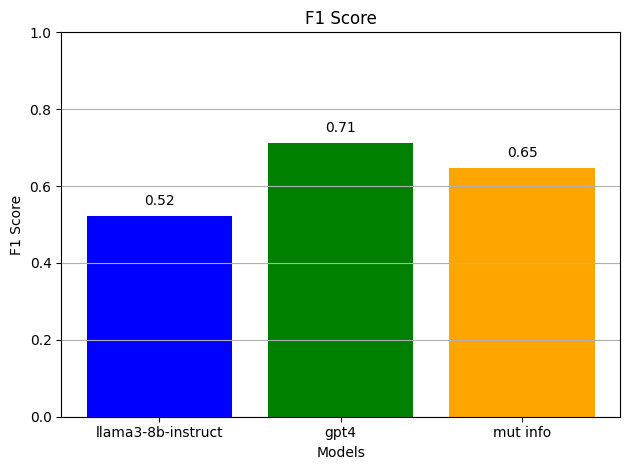

In [722]:
# Compute F1 scores for each model
llama_f1 = f1_score(maj_vote, llama, average='binary')
gpt4_f1 = f1_score(maj_vote, gpt4, average='binary')
mi_f1 = f1_score(maj_vote, mi_split_1, average='binary')

# Plotting
models = ['llama3-8b-instruct', 'gpt4', 'mut info']
f1_scores = [llama_f1, gpt4_f1, mi_f1]

fig, ax = plt.subplots()
ax.bar(models, f1_scores, color=['blue', 'green', 'orange'])
ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score')
ax.set_ylim(0, 1)  # Setting y-axis limit from 0 to 1 for F1 score
ax.grid(axis='y')

# Adding text annotations with the exact F1 scores on top of each bar
for i, score in enumerate(f1_scores):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [707]:
# helper_funcs 
def calculate_agreement(model_labels, pos_neg=None, maj_vote=maj_vote):
    if pos_neg == None:
        agreement = [int(i == j) for i, j in zip(model_labels, maj_vote)]
        return agreement, np.mean(agreement), len(agreement)
    elif pos_neg == 1:
        agreement = [int(i == j) for i, j in zip(model_labels, maj_vote) if j == 1]
        return agreement, np.mean(agreement), len(agreement)
    elif pos_neg == 0:
        agreement = [int(i == j) for i, j in zip(model_labels, maj_vote) if j == 0]
        print(len(agreement))
        return agreement, np.mean(agreement), len(agreement)
    
def bootstrap_se(data, n_bootstrap=1000):
    means = []
    n = len(data)
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    return np.std(means)

def compute_roc_auc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    return fpr, tpr, roc_auc

0.69
124
124
124


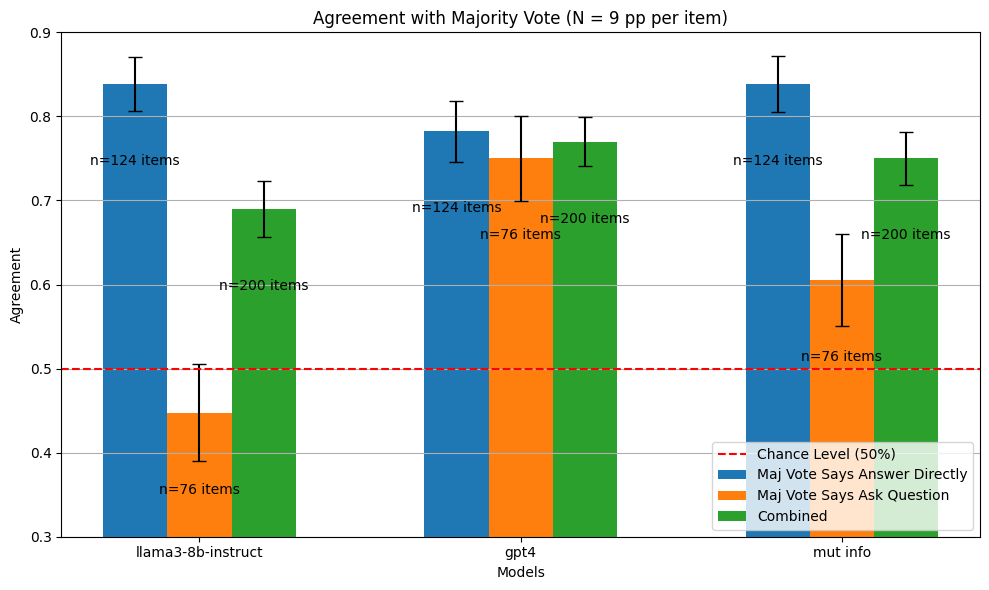

In [723]:
# Compute agreements for pos_neg == None, 0, and 1
llama_agreement_combined, mean_llama_agreement_combined, n_llama_combined = calculate_agreement(llama, pos_neg=None, maj_vote=maj_vote)
gpt4_agreement_combined, mean_gpt4_agreement_combined, n_gpt4_combined = calculate_agreement(gpt4, pos_neg=None, maj_vote=maj_vote)
mi_agreement_combined, mean_mi_agreement_combined, n_mi_combined = calculate_agreement(mi_split_1, pos_neg=None, maj_vote=maj_vote)
print(mean_llama_agreement_combined)
llama_agreement_answer_dir, mean_llama_agreement_answer_dir, n_llama_answer_dir = calculate_agreement(llama, pos_neg=0, maj_vote=maj_vote)
gpt4_agreement_answer_dir, mean_gpt4_agreement_answer_dir, n_gpt4_answer_dir = calculate_agreement(gpt4, pos_neg=0, maj_vote=maj_vote)
mi_agreement_answer_dir, mean_mi_agreement_answer_dir, n_mi_answer_dir = calculate_agreement(mi_split_1, pos_neg=0, maj_vote=maj_vote)

llama_agreement_ask_question, mean_llama_agreement_ask_question, n_llama_ask_question = calculate_agreement(llama, pos_neg=1, maj_vote=maj_vote)
gpt4_agreement_ask_question, mean_gpt4_agreement_ask_question, n_gpt4_ask_question = calculate_agreement(gpt4, pos_neg=1, maj_vote=maj_vote)
mi_agreement_ask_question, mean_mi_agreement_ask_question, n_mi_ask_question = calculate_agreement(mi_split_1, pos_neg=1, maj_vote=maj_vote)

# Bootstrapped standard error calculation
llama_boot_se_combined = bootstrap_se(llama_agreement_combined)
gpt4_boot_se_combined = bootstrap_se(gpt4_agreement_combined)
mi_boot_se_combined = bootstrap_se(mi_agreement_combined)

llama_boot_se_answer_dir = bootstrap_se(llama_agreement_answer_dir)
gpt4_boot_se_answer_dir = bootstrap_se(gpt4_agreement_answer_dir)
mi_boot_se_answer_dir = bootstrap_se(mi_agreement_answer_dir)

llama_boot_se_ask_question = bootstrap_se(llama_agreement_ask_question)
gpt4_boot_se_ask_question = bootstrap_se(gpt4_agreement_ask_question)
mi_boot_se_ask_question = bootstrap_se(mi_agreement_ask_question)

# Plotting
models = ['llama3-8b-instruct', 'gpt4', 'mut info']
labels = ['Maj Vote Says Answer Directly', 'Maj Vote Says Ask Question', 'Combined']
agreements = [
    [mean_llama_agreement_answer_dir, mean_llama_agreement_ask_question, mean_llama_agreement_combined],
    [mean_gpt4_agreement_answer_dir, mean_gpt4_agreement_ask_question, mean_gpt4_agreement_combined],
    [mean_mi_agreement_answer_dir, mean_mi_agreement_ask_question, mean_mi_agreement_combined]
]
n_values = [
    [n_llama_answer_dir, n_llama_ask_question, n_llama_combined],
    [n_gpt4_answer_dir, n_gpt4_ask_question, n_gpt4_combined],
    [n_mi_answer_dir, n_mi_ask_question, n_mi_combined]
]
boot_se_values = [
    [llama_boot_se_answer_dir, llama_boot_se_ask_question, llama_boot_se_combined],
    [gpt4_boot_se_answer_dir, gpt4_boot_se_ask_question, gpt4_boot_se_combined],
    [mi_boot_se_answer_dir, mi_boot_se_ask_question, mi_boot_se_combined]
]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(labels)):
    ax.bar(x + i * width - width, [agreements[j][i] for j in range(len(models))], width, label=labels[i], yerr=[boot_se_values[j][i] for j in range(len(models))], capsize=5)
    for j in range(len(models)):
        ax.text(x[j] + i * width - width, agreements[j][i] - 0.1, f'n={n_values[j][i]} items', ha='center', va='bottom')

ax.axhline(y=0.5, color='r', linestyle='--', label='Chance Level (50%)')
ax.set_xlabel('Models')
ax.set_ylabel('Agreement')
ax.set_title('Agreement with Majority Vote (N = 9 pp per item)')
ax.set_xticks(x)
ax.set_ylim(.3, .9)
ax.grid(axis='y')
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


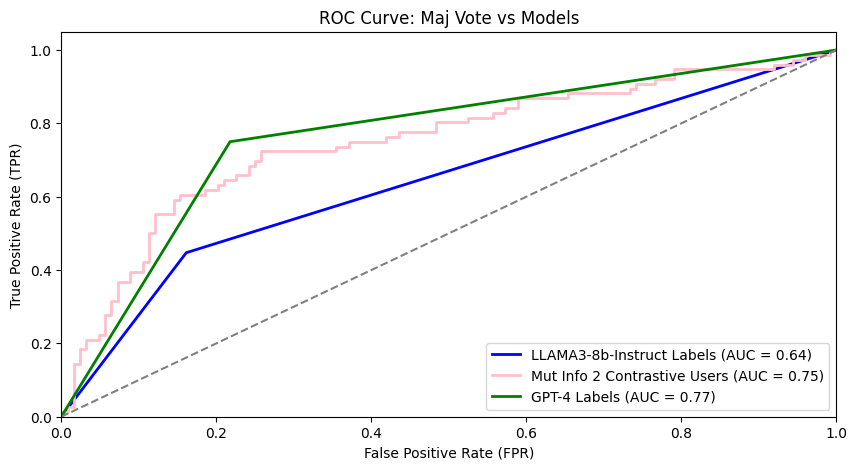

In [721]:
# Compute ROC curves for LLAMA and GPT-4 compared to Philipp
fpr_llama, tpr_llama, roc_auc_llama = compute_roc_auc(maj_vote, llama)
fpr_gpt4, tpr_gpt4, roc_auc_gpt4 = compute_roc_auc(maj_vote, gpt4)
fpr_mi_2, tpr_mi_2, roc_auc_mi_2 = compute_roc_auc(maj_vote, mi_2)
fpr_mi_3, tpr_mi_3, roc_auc_mi_3 = compute_roc_auc(maj_vote, mi_3)
fpr_mi_4, tpr_mi_4, roc_auc_mi_4 = compute_roc_auc(maj_vote, mi_4)
fpr_mi_5, tpr_mi_5, roc_auc_mi_5 = compute_roc_auc(maj_vote, mi_5)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_llama, tpr_llama, color='blue', lw=2, label=f'LLAMA3-8b-Instruct Labels (AUC = {roc_auc_llama:.2f})')
plt.plot(fpr_mi_2, tpr_mi_2, color='pink', lw=2, label=f'Mut Info 2 Contrastive Users (AUC = {roc_auc_mi_2:.2f})')
# plt.plot(fpr_mi_3, tpr_mi_3, color='orange', lw=2, label=f'Mut Info 3 Users (AUC = {roc_auc_mi_3:.2f})')
# plt.plot(fpr_mi_4, tpr_mi_4, color='black', lw=2, label=f'Mut Info 4 Users (AUC = {roc_auc_mi_4:.2f})')
plt.plot(fpr_gpt4, tpr_gpt4, color='green', lw=2, label=f'GPT-4 Labels (AUC = {roc_auc_gpt4:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve: Maj Vote vs Models')
plt.legend(loc="lower right")
plt.show()

44


/tmp/user/22820/ipykernel_2448805/4267994257.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(ncol=3, loc="upper left")


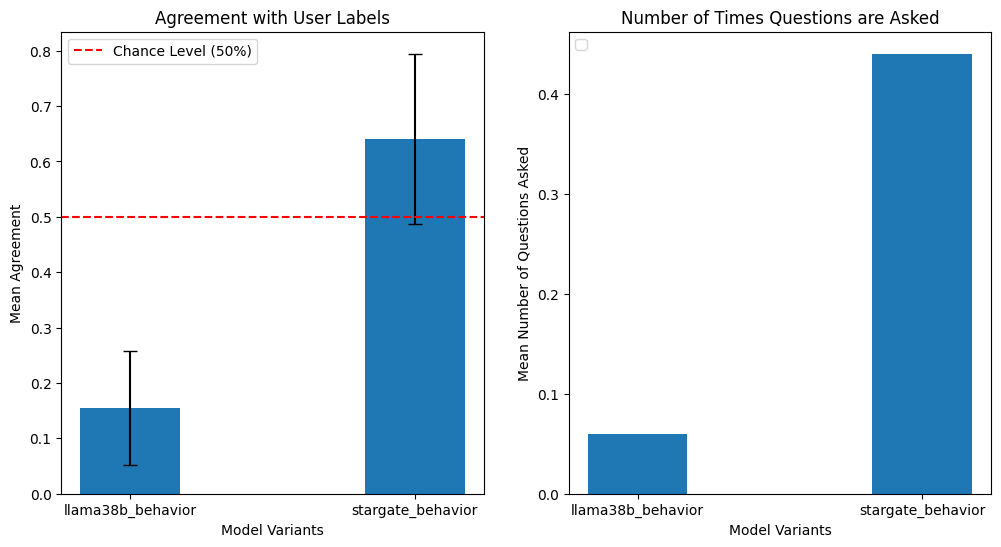

In [677]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load labels
# philipp = json.load(open('data/labels/philpp_labels.json'))[:150]


# llama38b_behavior and stargate_behavior
llama38b_behavior = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
stargate_behavior = [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]


print(stargate_behavior.count(1))
# Calculate agreements
def calculate_agreement(model_labels):
    return [int(i == j) for i, j in zip(model_labels, maj_vote) if j == 1]

agreement_philipp_llama38b_behavior = calculate_agreement(llama38b_behavior)
agreement_philipp_stargate_behavior = calculate_agreement(stargate_behavior)

# Calculate means
mean_llama38b_behavior = np.mean(agreement_philipp_llama38b_behavior)
mean_stargate_behavior = np.mean(agreement_philipp_stargate_behavior)

# Bootstrap confidence intervals
def bootstrap_ci(data, n_bootstrap=1000, ci_percentile=95):
    means = []
    n = len(data)
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci_percentile)/2)
    upper = np.percentile(means, 100-(100-ci_percentile)/2)
    return lower, upper

ci_llama38b_behavior = bootstrap_ci(agreement_philipp_llama38b_behavior)
ci_stargate_behavior = bootstrap_ci(agreement_philipp_stargate_behavior)

# Create lists for plotting
labels = ['llama38b_behavior', 'stargate_behavior']
means_agreement = [
    mean_llama38b_behavior,
    mean_stargate_behavior
]
ci_lower_agreement = [
    mean_llama38b_behavior - ci_llama38b_behavior[0],
    mean_stargate_behavior - ci_stargate_behavior[0]
]
ci_upper_agreement = [
    ci_llama38b_behavior[1] - mean_llama38b_behavior,
    ci_stargate_behavior[1] - mean_stargate_behavior
]

# Calculate the mean number of times questions are asked
mean_questions_llama38b_behavior = np.mean(llama38b_behavior)
mean_questions_stargate_behavior = np.mean(stargate_behavior)

means_questions = [
    mean_questions_llama38b_behavior,
    mean_questions_stargate_behavior
]

# Plotting the agreements with confidence intervals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = np.arange(len(labels))
bar_width = 0.35

# Left panel: Agreement with Philipp
rects1 = ax1.bar(x, means_agreement, bar_width, yerr=[ci_lower_agreement, ci_upper_agreement], capsize=5)
ax1.axhline(y=0.5, color='r', linestyle='--', label='Chance Level (50%)')
ax1.set_xlabel('Model Variants')
ax1.set_ylabel('Mean Agreement')
ax1.set_title('Agreement with User Labels')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(ncol=3, loc="upper left")

# Right panel: Number of times questions are asked
rects2 = ax2.bar(x, means_questions, bar_width)

ax2.set_xlabel('Model Variants')
ax2.set_ylabel('Mean Number of Questions Asked')
ax2.set_title('Number of Times Questions are Asked')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend(ncol=3, loc="upper left")

